### Comparison based on the Train data

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Load the dataset
df = pd.read_csv(r"D:\Materials\Academic\Semester 8\AI and ML\Coding\Datasets\Deformation ML File.csv")

In [5]:
df.head()

,stiffener_height_mm,plate_thickness_mm,stiffener_thickess_mm,pressure_mm,deformation_mm,mass_kg
0,40.6875,2.389063,1.895312,0.050469,3.748899,2.403142
1,45.6875,2.173437,1.904688,0.098281,9.382610,2.252441
2,35.1875,2.454687,2.129688,0.061406,4.329086,2.452294
3,43.4375,3.073437,1.979688,0.058281,2.137503,3.039688
4,35.8125,3.251562,1.154688,0.053281,2.034908,3.021081


In [6]:
# Size of the dataset
df.shape

(149, 6)

In [7]:
# Assigning X as Input and Y as Output
X=df.drop('deformation_mm', axis=1)
Y=df['deformation_mm']

In [8]:
# Output Visualization
Y.head()

0    3.748899
1    9.382610
2    4.329086
3    2.137503
4    2.034908
Name: deformation_mm, dtype: float64

In [9]:
# Input Visualization
X.head()

,stiffener_height_mm,plate_thickness_mm,stiffener_thickess_mm,pressure_mm,mass_kg
0,40.6875,2.389063,1.895312,0.050469,2.403142
1,45.6875,2.173437,1.904688,0.098281,2.252441
2,35.1875,2.454687,2.129688,0.061406,2.452294
3,43.4375,3.073437,1.979688,0.058281,3.039688
4,35.8125,3.251562,1.154688,0.053281,3.021081


In [10]:
# Spliting the dataset into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=42)

### Apply Linear Regression

In [12]:
model=LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
train_predictions= model.predict(X_train)
train_matrics= {
    'Model': 'Linear Regression',
    'MSE': mean_squared_error(Y_train, train_predictions),
    'MAE': mean_absolute_error(Y_train, train_predictions),
    'R2': r2_score(Y_train, train_predictions),
    'MAPE': mean_absolute_percentage_error(Y_train, train_predictions)
}

print(train_matrics)

{'Model': 'Linear Regression', 'MSE': 0.36230592700742514, 'MAE': 0.485700843179659, 'R2': 0.914519209676332, 'MAPE': 0.14354607457681887}


In [14]:
# creating an empty list to store the result
results =[]
results.append(train_matrics)

results

[{'Model': 'Linear Regression',
  'MSE': 0.36230592700742514,
  'MAE': 0.485700843179659,
  'R2': 0.914519209676332,
  'MAPE': 0.14354607457681887}]

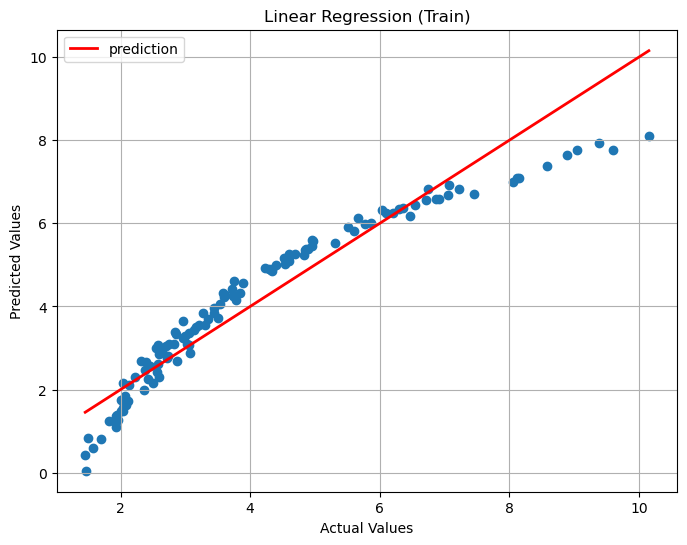

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_train, train_predictions)
plt.plot([Y_train.min(), Y_train.max()],
         [Y_train.min(), Y_train.max()],
         color='red', linewidth=2, label='prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression (Train)')
plt.legend()
plt.grid(True)
plt.savefig("Linear Regression (Train).png", dpi=600, bbox_inches="tight")
plt.show()

## Apply Polynomial Degree 2

In [17]:
polynomial_2 = PolynomialFeatures(degree=2)

In [18]:
X_train_poly_2 = polynomial_2.fit_transform(X_train)

X_test_poly_2 = polynomial_2.transform(X_test)

In [19]:
model = LinearRegression()

In [20]:
# Train the model

model.fit(X_train_poly_2, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
train_predictions_2 = model.predict(X_train_poly_2)
train_metrics_2 = {
    'Model': 'Polynomial Deg 2',
    "MSE": mean_squared_error(Y_train, train_predictions_2),
    "MAE": mean_absolute_error(Y_train, train_predictions_2),
    "R2": r2_score(Y_train, train_predictions_2),
    "MAPE": mean_absolute_percentage_error(Y_train, train_predictions_2)
}

print(train_metrics_2)

{'Model': 'Polynomial Deg 2', 'MSE': 0.017599115789627993, 'MAE': 0.10880630085624556, 'R2': 0.9958477457459195, 'MAPE': 0.03239545879936738}


In [22]:
# Append the result

results.append(train_metrics_2)

In [23]:
results

[{'Model': 'Linear Regression',
  'MSE': 0.36230592700742514,
  'MAE': 0.485700843179659,
  'R2': 0.914519209676332,
  'MAPE': 0.14354607457681887},
 {'Model': 'Polynomial Deg 2',
  'MSE': 0.017599115789627993,
  'MAE': 0.10880630085624556,
  'R2': 0.9958477457459195,
  'MAPE': 0.03239545879936738}]

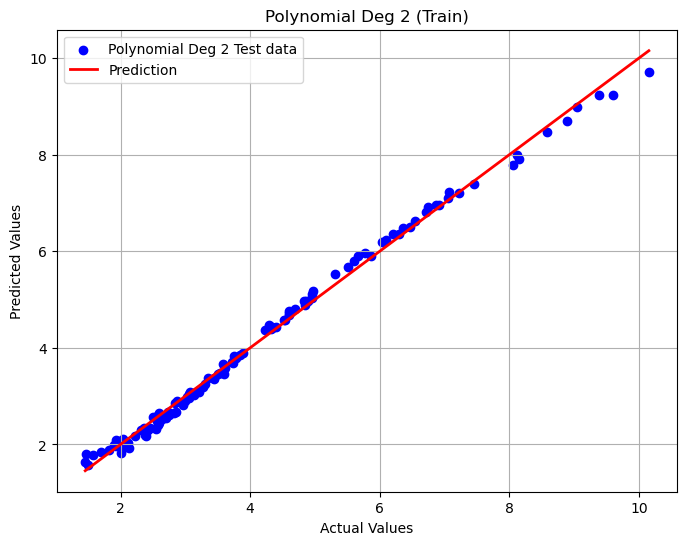

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(Y_train, train_predictions_2, color='blue', label='Polynomial Deg 2 Test data')
plt.plot([Y_train.min(), Y_train.max()],
         [Y_train.min(), Y_train.max()],
         color='red', linewidth=2, label='Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Deg 2 (Train)')
plt.legend()
plt.grid(True)
plt.savefig("Polynomial Deg2 (Train).png", dpi=600, bbox_inches="tight")
plt.show()

## Apply polynomial Deg 3

In [26]:
polynomial_3 = PolynomialFeatures(degree=3)

In [27]:
X_train_poly_3 = polynomial_3.fit_transform(X_train)

X_test_poly_3 = polynomial_3.transform(X_test)

In [28]:
# Train the model# Train the model

model.fit(X_train_poly_3, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
train_predictions_3 = model.predict(X_train_poly_3)
train_metrics_3 = {
    'Model': 'Polynomial Deg 3',
    "MSE": mean_squared_error(Y_train, train_predictions_3),
    "MAE": mean_absolute_error(Y_train, train_predictions_3),
    "R2": r2_score(Y_train, train_predictions_3),
    "MAPE": mean_absolute_percentage_error(Y_train, train_predictions_3)
}

print(train_metrics_3)

{'Model': 'Polynomial Deg 3', 'MSE': 0.0003158718919618382, 'MAE': 0.01448468218193939, 'R2': 0.9999254746418615, 'MAPE': 0.004299639621961551}


In [30]:
# Append the result

results.append(train_metrics_3)

In [31]:
results

[{'Model': 'Linear Regression',
  'MSE': 0.36230592700742514,
  'MAE': 0.485700843179659,
  'R2': 0.914519209676332,
  'MAPE': 0.14354607457681887},
 {'Model': 'Polynomial Deg 2',
  'MSE': 0.017599115789627993,
  'MAE': 0.10880630085624556,
  'R2': 0.9958477457459195,
  'MAPE': 0.03239545879936738},
 {'Model': 'Polynomial Deg 3',
  'MSE': 0.0003158718919618382,
  'MAE': 0.01448468218193939,
  'R2': 0.9999254746418615,
  'MAPE': 0.004299639621961551}]

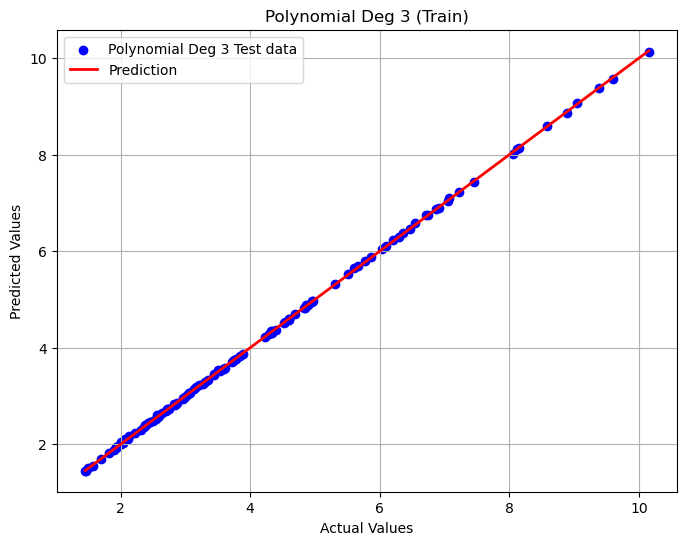

In [126]:
plt.figure(figsize=(8,6))
plt.scatter(Y_train, train_predictions_3, color='blue', label='Polynomial Deg 3 Test data')
plt.plot([Y_train.min(), Y_train.max()],
         [Y_train.min(), Y_train.max()],
         color='red', linewidth=2, label='Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Deg 3 (Train)')
plt.legend()
plt.grid(True)
plt.savefig("Polynomail Deg3(Train).png", dpi=600, bbox_inches="tight")
plt.show()

In [33]:
# Convert all results to a DataFrame
df_results = pd.DataFrame(results)

In [34]:
df_results

,Model,MSE,MAE,R2,MAPE
0,Linear Regression,0.362306,0.485701,0.914519,0.143546
1,Polynomial Deg 2,0.017599,0.108806,0.995848,0.032395
2,Polynomial Deg 3,0.000316,0.014485,0.999925,0.004300


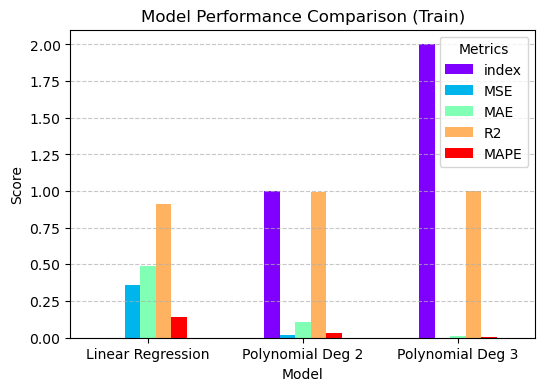

In [102]:
# Plot bar chart
df_results.reset_index(inplace=True) # Reset the index to remove 0,1,2 and set name
df_results.set_index("Model", inplace=True)
ax = df_results.plot(kind="bar", colormap="rainbow", figsize=(6,4))

plt.title("Model Performance Comparison (Train)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=0) 
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("Performance Comparison (Train).png", dpi=600, bbox_inches="tight") # Save figure